# PVOps Functionality Tutorial



In [1]:
import text_class_example

import sys
sys.path.append('..')
from pvops.text import remap_attributes

#import text2series_class_example  ; uncomment when completed
import pandas as pd
import matplotlib.pyplot as plt

## Problem statements:

### 1. Text Preprocessing
Process the documents into concise, machine learning-ready documents. Additionally, extract dates from the text.

### 2. Text Classification
The written tickets are used to make an inference on the specified event descriptor.


## Text processing 

### Import text data

In [2]:
folder = 'example_data//'
filename = 'example_ML_ticket_data.csv'
df = pd.read_csv(folder+filename)
df.head(n=3)

,Date_EventStart,Date_EventEnd,Asset,CompletionDesc,Cause,ImpactLevel,randid
0,8/16/2018 9:00,8/22/2018 17:00,Combiner,cb 1.18 was found to have contactor issue woul...,0000 - Unknown.,Underperformance,38
1,9/17/2018 18:25,9/18/2018 9:50,Pad,self resolved. techdispatched: no,004 - Under voltage.,Underperformance,46
2,8/26/2019 9:00,11/5/2019 17:00,Facility,"all module rows washed, waiting for final repo...",0000 - Unknown,Underperformance,62


### Establish settings

Specify column names which will be used in this pipeline.

In [3]:
DATA_COLUMN = "CompletionDesc"   # Contains document
LABEL_COLUMN = "Asset"           # Establish event descriptor which will be inferenced by classifiers
DATE_COLUMN = 'Date_EventStart'  # Date of ticket (start date, end date; any reflective date will do), used in date extracting pipeline to replace information not specified in ticket

### Step 0: If needed, map raw labels to a cleaner set of labels

This step is 

In [4]:
asset_remap_filename = 'mappings_asset.csv'
REMAPPING_COL_FROM = 'in'
REMAPPING_COL_TO = 'out_'
remapping_df = pd.read_csv(folder+asset_remap_filename)

In [5]:
remapping_col_dict = {
    'attribute_col': LABEL_COLUMN,
    'remapping_col_from': REMAPPING_COL_FROM,
    'remapping_col_to': REMAPPING_COL_TO
}

df_remapped_assets = remap_attributes.remap_attributes(df, remapping_df, remapping_col_dict)

df = df_remapped_assets

Original attribute distribution:
Facility                  37
Inverter                  34
Tracker                    8
Combiner                   7
Substation                 3
Met station                2
Summary                    1
Pad                        1
Meter                      1
Ground-Mount PV System     1
Energy Storage/Battery     1
Transformer                1
Module                     1
Pyranometer                1
String                     1
Name: Asset, dtype: int64
Final attribute distribution:
facility          37
inverter          34
tracker            8
combiner           7
met station        3
substation         3
module             2
energy storage     1
transformer        1
energy meter       1
Name: Asset, dtype: int64


In [6]:
df[LABEL_COLUMN].value_counts()

facility          37
inverter          34
tracker            8
combiner           7
met station        3
substation         3
module             2
energy storage     1
transformer        1
energy meter       1
Name: Asset, dtype: int64

### Step 1: Establish example instance and render preliminary information about the tickets

In [7]:
# Establish the class object (found in text_class_example.py)
print(df[LABEL_COLUMN].value_counts())

e = text_class_example.Example(df, LABEL_COLUMN)
e.summarize_text_data(DATA_COLUMN)

facility          37
inverter          34
tracker            8
combiner           7
met station        3
substation         3
module             2
energy storage     1
transformer        1
energy meter       1
Name: Asset, dtype: int64
DETAILS
  100 samples
  0 invalid documents
  33.52 words per sample on average
  Number of unique words 1213
  3352.00 total words


### Visualize timeseries of ticket publications

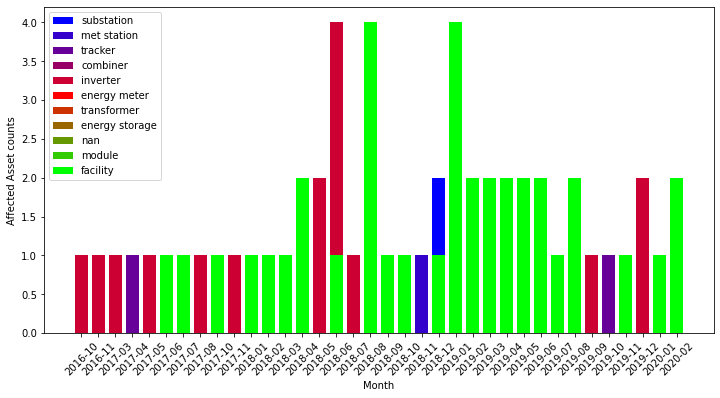

In [8]:
fig = e.visualize_attribute_timeseries(DATE_COLUMN)
plt.show()

### Functionality 1.1: Extract dates

In [9]:
# Extract date from ticket, if any. This framework is not 100% correct.
dates_df = e.extract_dates(DATA_COLUMN, DATE_COLUMN, SAVE_DATE_COLUMN='ExtractedDates')
dates_df

,CompletionDesc,ExtractedDates
0,cb 1.18 was found to have contactor issue woul...,[]
1,self resolved. techdispatched: no,[]
2,"all module rows washed, waiting for final repo...",[2019-09-01 09:00:00]
3,14 nov: we were alerted that e-c3-1 had faulte...,"[2017-11-14 07:46:00, 2017-03-01 07:46:00]"
4,assessed condition filters all inverters. litt...,[]
...,...,...
95,cleared cleared alert however psi is -3 invert...,[2016-11-03 09:28:00]
96,c4 closed remotely. techdispatched: no,[]
97,pure power fixed damaged source circuits did f...,"[2019-04-16 09:00:00, 2019-03-16 15:15:00]"
98,checked network connection to rm-1 didn't see ...,[]


### Functionality 1.2: Preprocess data for the Machine Learning classification

In [10]:
preprocessed_df = e.prep_data_for_ML(DATA_COLUMN, DATE_COLUMN)
preprocessed_df

,CompletionDesc,CleanDesc
0,8/39/19 inverter was faulted with lp15 (low pr...,inverter faulted lp low pressure inverter show...
1,all weekly substation tasks completed.. techdi...,weekly substation tasks completed techdispatch...
2,14 nov: we were alerted that e-c3-1 had faulte...,nov alerted e c faulted upon investigation not...
3,resolved. techdispatched: no,resolved techdispatched
4,"10/2/19 e-1, row 51, e1-3-51-1. tracker tracki...",row tracker tracking wrong lubed gear boxes tr...
...,...,...
89,c4 closed remotely. techdispatched: no,closed remotely techdispatched
90,all inspections were completed accordance with...,inspections completed accordance checklists fi...
91,damaged strings have been isolated array combi...,damaged strings isolated array combiner cb tur...
92,w/o trackers 1/25/19 morning check west: *w-b1...,w trackers morning check west row tracking wro...


### Results of text processing

In [11]:
print("Pre-text processing")
e.summarize_text_data(DATA_COLUMN)

print("\nPost-text processing")
e.summarize_text_data('CleanDesc')

Pre-text processing
DETAILS
  94 samples
  0 invalid documents
  35.10 words per sample on average
  Number of unique words 1197
  3299.00 total words

Post-text processing
DETAILS
  94 samples
  0 invalid documents
  21.35 words per sample on average
  Number of unique words 714
  2007.00 total words


### Visualizing entropy of clustering technique pre- and post- processing

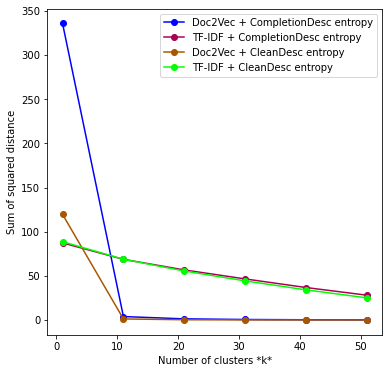

In [12]:
fig = e.visualize_cluster_entropy([DATA_COLUMN, 'CleanDesc'])
plt.show()

### Functionality 1.3: Frequency plot

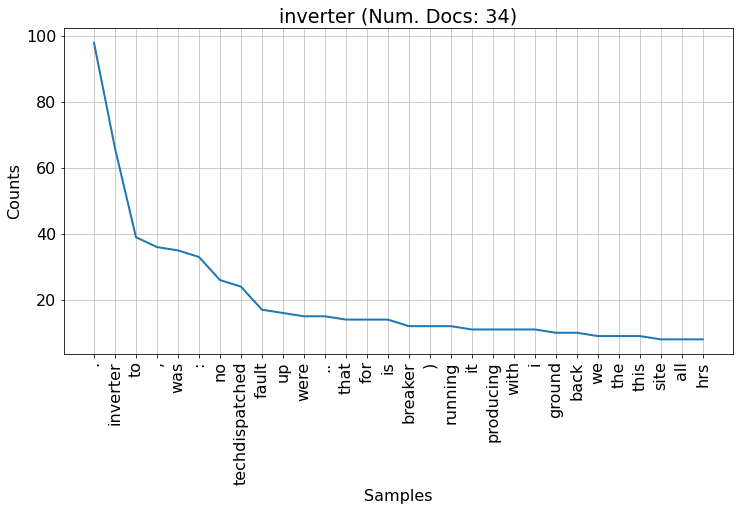

In [13]:
# Frequency plot on unprocessed data
fig = e.visualize_freqPlot(LBL_CAT='inverter', DATA_COLUMN=DATA_COLUMN)
plt.show()

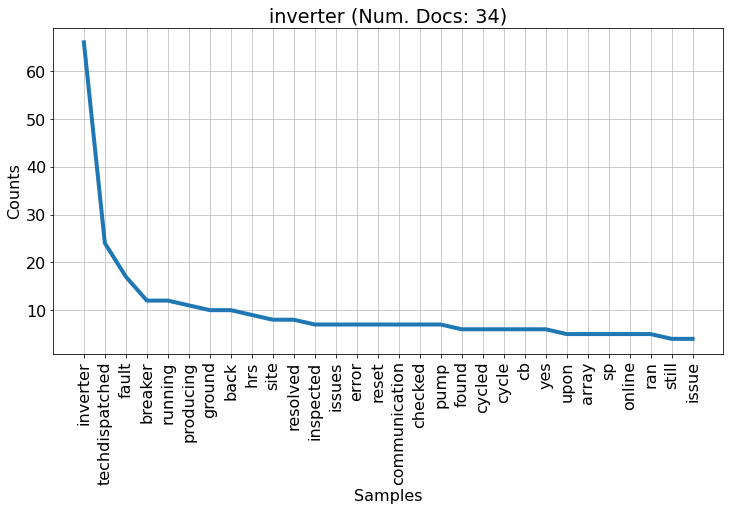

In [14]:
# Frequency plot on processed data
fig = e.visualize_freqPlot(LBL_CAT='inverter',
                            # Optional, kwargs into nltk's FreqDist
                            graph_aargs = {
                                'linewidth':4
                            }
                        )
plt.show()

### Hint: Use the below code to visualize frequency plots for all assets
    
    set_labels = list(set(e.df[e.LABEL_COLUMN].tolist()))
    for lbl in set_labels:
        fig = e.visualize_freqPlot(LBL_CAT=lbl)
        plt.show()

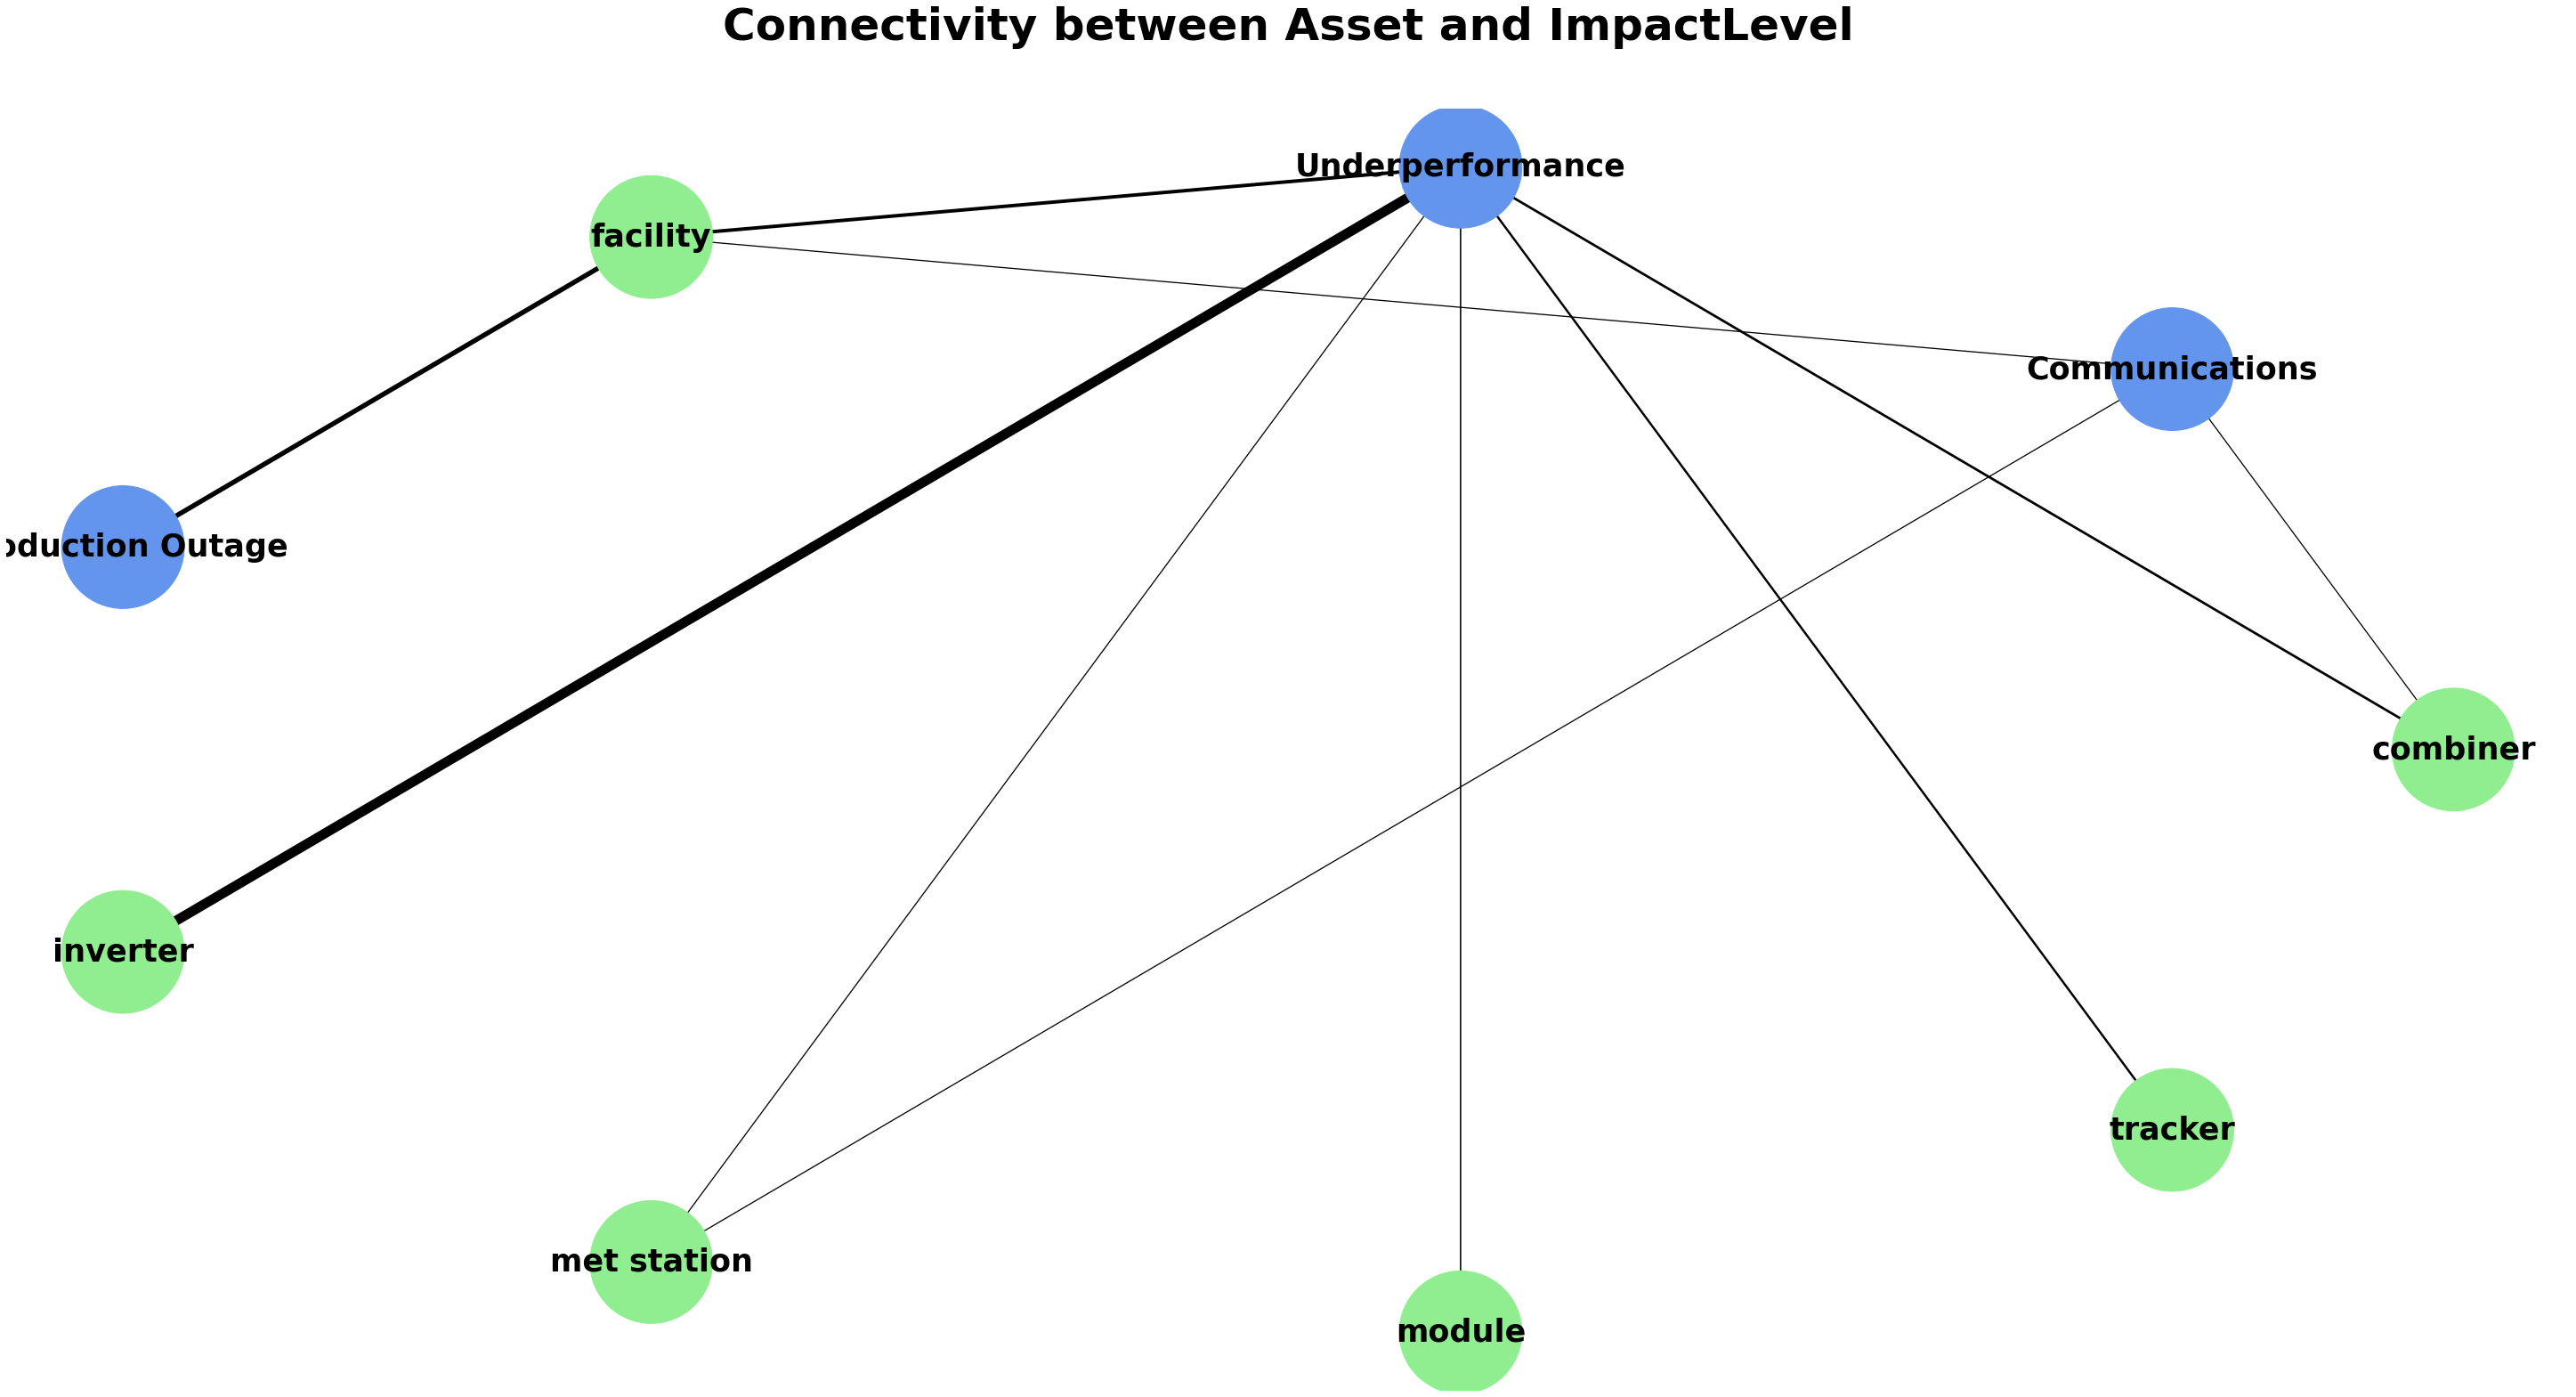

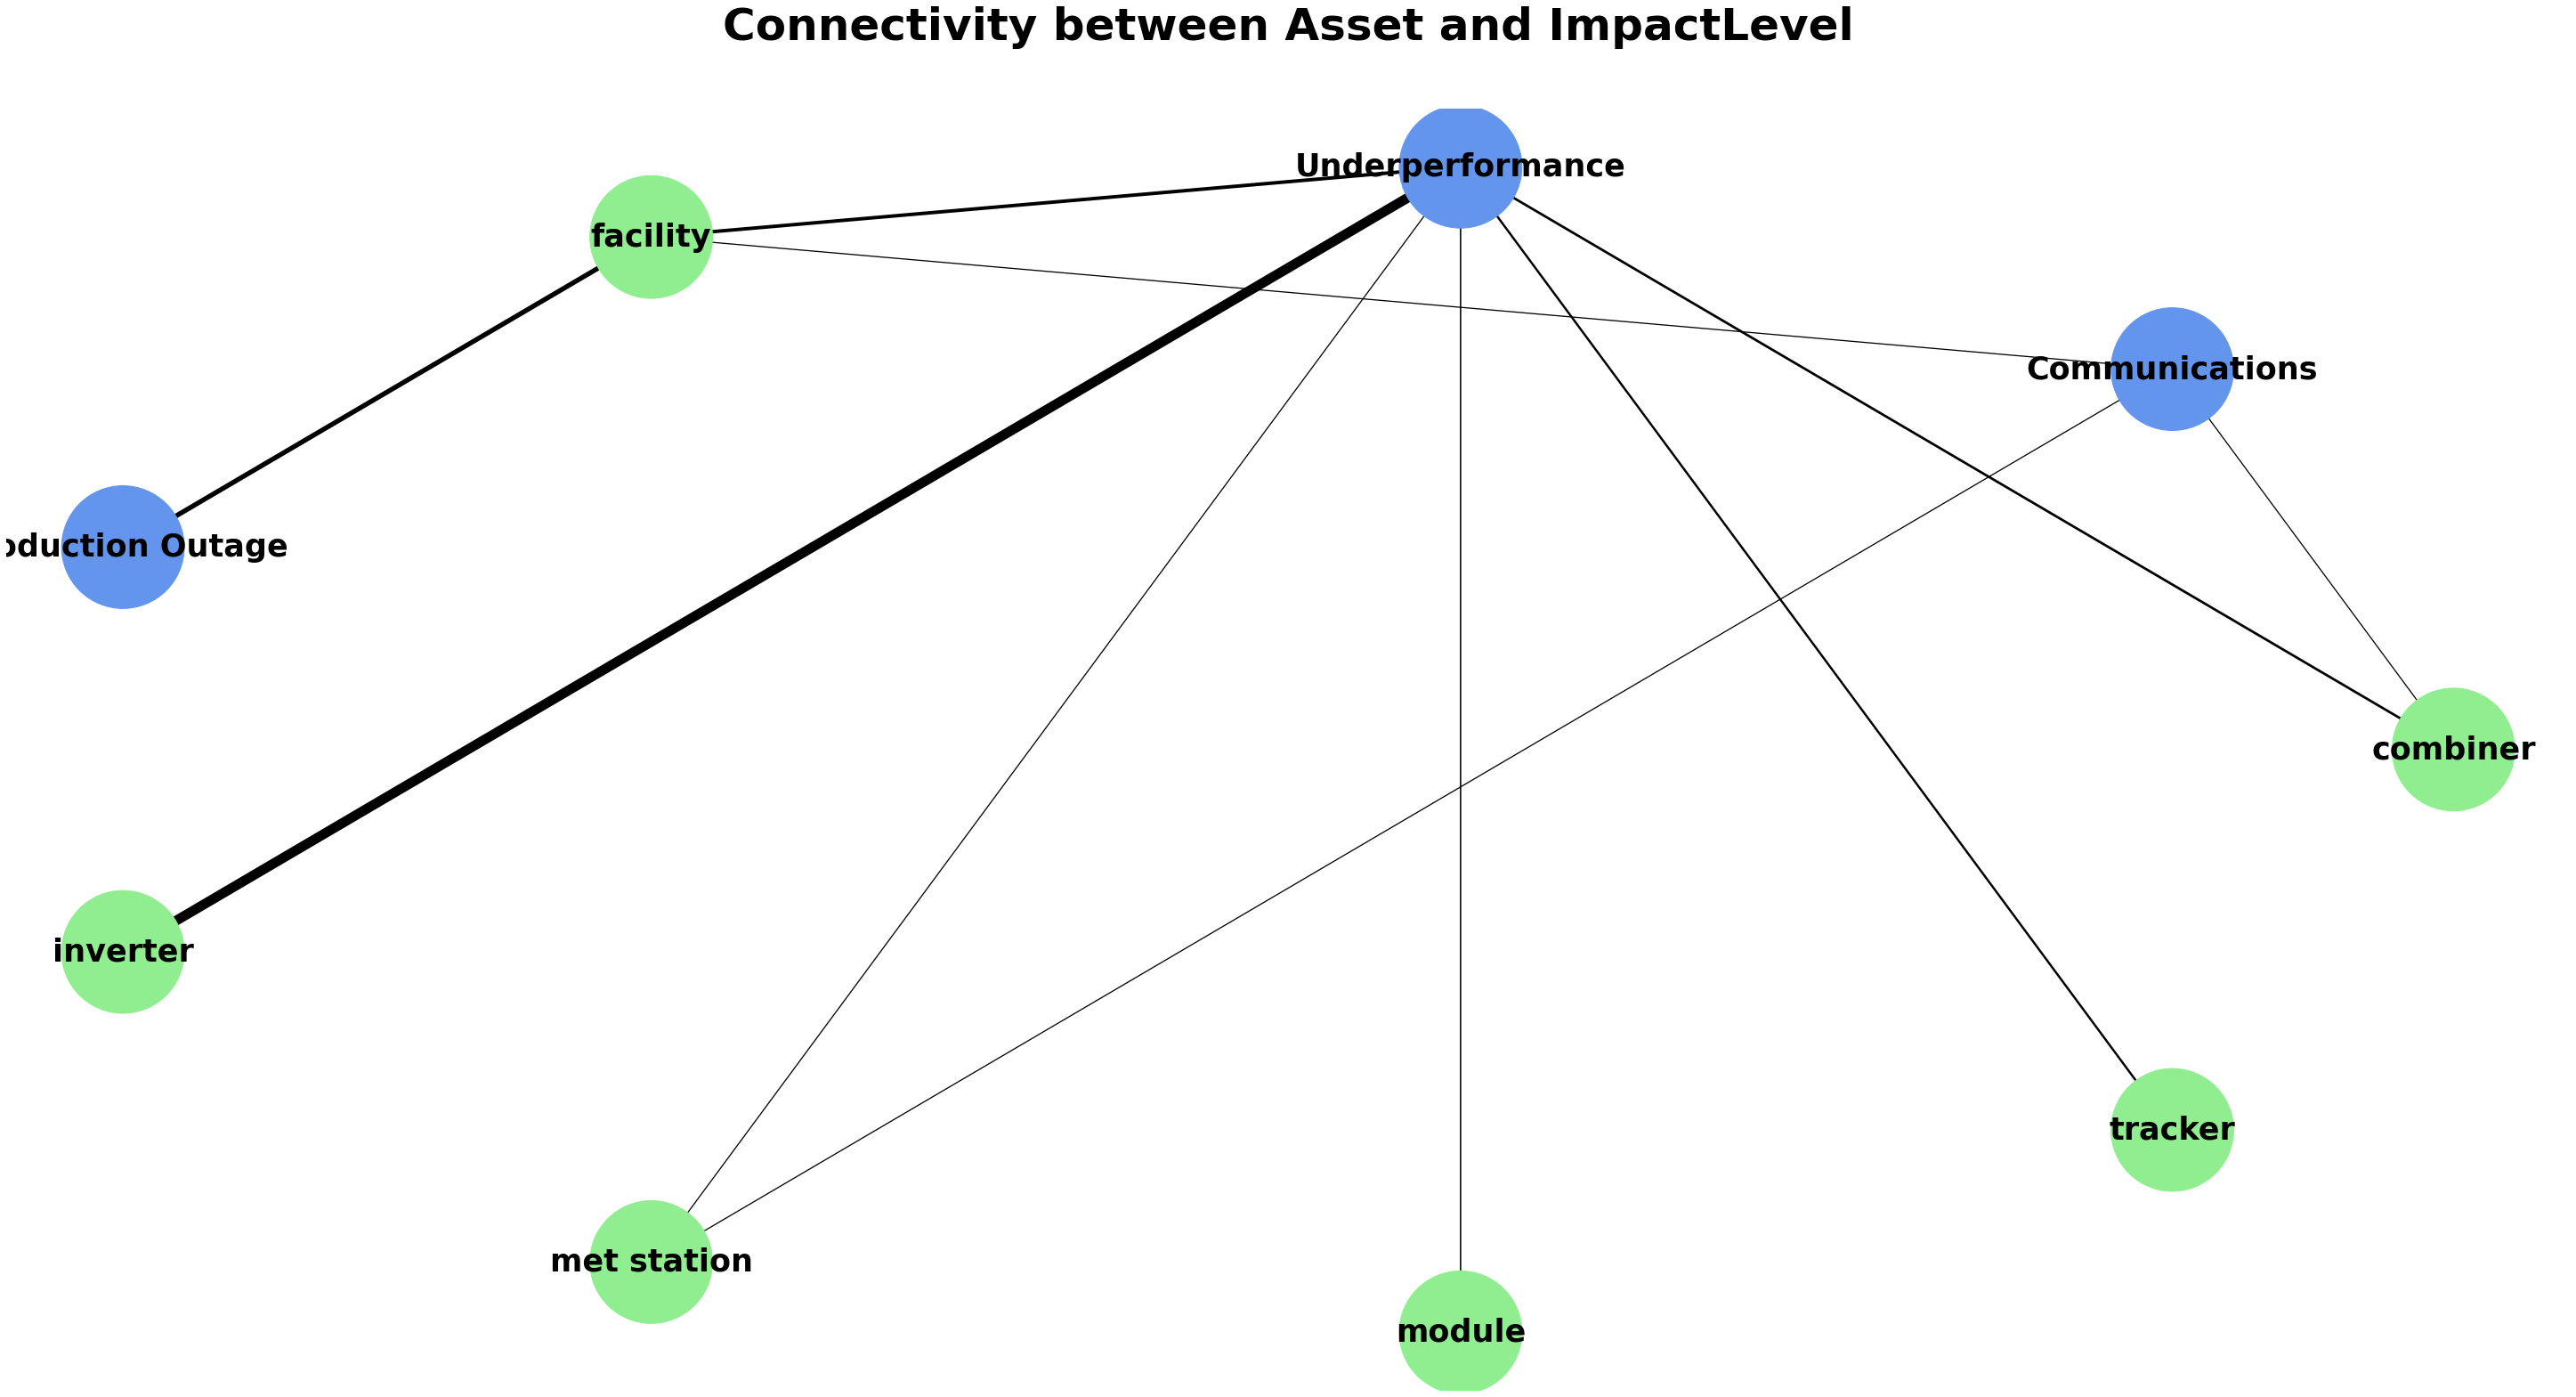

In [15]:
# Only supports two attributes
om_col_dict = {
    'attribute1_col': 'Asset',
    'attribute2_col': 'ImpactLevel'
}

fig,edges = e.visualize_attribute_connectivity(om_col_dict,
            # Optional
            graph_aargs = {'with_labels':True,
                            'font_weight':'bold',
                            'node_size':19000,
                            'font_size':35}
)
plt.show()

fig,edges = e.visualize_attribute_connectivity(om_col_dict,
            # Optional
            graph_aargs = {'with_labels':True,
                            'font_weight':'bold',
                            'node_size':19000,
                            'font_size':35}
    )
plt.show()

### Functionality 2.1: Conduct supervised classification on tickets using a cross-validated grid search

In [16]:
# Setting few cross validation splits because of few example data
results, best_model = e.classify_supervised(n_cv_splits=2, embedding='doc2vec')
print('best_model', best_model)
results

Starting ML analysis with Doc2Vec embeddings
best_model Pipeline(steps=[('doc2vec', Doc2VecModel(callbacks=None, epochs=30, window=10)),
                ('clf', BaggingClassifier(n_estimators=100))])


,estimator,min_score,mean_score,max_score,std_score,mean_fit_time,clf__C,clf__max_iter,doc2vec__epochs,doc2vec__vector_size,...,clf__alpha,clf__batch_size,clf__hidden_layer_sizes,clf__learning_rate,clf__solver,clf__loss,clf__normalize,clf__n_estimators,clf__max_samples,clf__algorithm
247,BaggingClassifier,0.39257,0.42561,0.458649,0.0330395,1.87262,NaN,NaN,30,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,1,NaN
270,AdaBoostClassifier,0.398556,0.401647,0.404739,0.00309155,1.15997,NaN,NaN,30,100,...,NaN,NaN,NaN,0.9,NaN,NaN,NaN,50,NaN,SAMME.R
274,AdaBoostClassifier,0.398556,0.401647,0.404739,0.00309155,1.33953,NaN,NaN,30,100,...,NaN,NaN,NaN,0.9,NaN,NaN,NaN,100,NaN,SAMME.R
32,MLPClassifier,0.382979,0.38951,0.396042,0.0065316,2.67104,NaN,1000,30,40,...,0.01,auto,"(100,)",adaptive,adam,NaN,NaN,NaN,NaN,NaN
255,BaggingClassifier,0.354423,0.379247,0.40407,0.0248235,1.84533,NaN,NaN,30,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,0.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,PassiveAggressiveClassifier,0.00765957,0.0105048,0.01335,0.00284522,0.683605,0,NaN,30,40,...,NaN,NaN,NaN,NaN,NaN,squared_hinge,NaN,NaN,NaN,NaN
161,PassiveAggressiveClassifier,0.00765957,0.0105048,0.01335,0.00284522,0.679614,0,NaN,30,40,...,NaN,NaN,NaN,NaN,NaN,squared_hinge,NaN,NaN,NaN,NaN
162,PassiveAggressiveClassifier,0.00765957,0.0105048,0.01335,0.00284522,0.674546,0,NaN,30,100,...,NaN,NaN,NaN,NaN,NaN,squared_hinge,NaN,NaN,NaN,NaN
163,PassiveAggressiveClassifier,0.00765957,0.0105048,0.01335,0.00284522,0.69653,0,NaN,30,100,...,NaN,NaN,NaN,NaN,NaN,squared_hinge,NaN,NaN,NaN,NaN


### Functionality 1.4: Conduct unsupervised clustering  on tickets using a cross-validated grid search

In [17]:
# Setting few cross validation splits because of few example data
results, best_model = e.classify_unsupervised(n_cv_splits=2, embedding='doc2vec')
print('best_model', best_model)
results

Starting ML analysis with Doc2Vec embeddings
best_model Pipeline(steps=[('doc2vec', Doc2VecModel(callbacks=None, epochs=30)),
                ('to_dense', DataDensifier()),
                ('clf', AffinityPropagation(max_iter=600))])


,estimator,min_score,mean_score,max_score,std_score,mean_fit_time,clf__damping,clf__max_iter,doc2vec__epochs,doc2vec__vector_size,doc2vec__window,clf__branching_factor,clf__n_clusters,clf__threshold,clf__init,clf__n_init,clf__bandwidth,clf__bin_seeding
6,AffinityPropagation,0.153358,0.255195,0.357033,0.101838,0.879408,0.5,600,30,100,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,KMeans,0.217409,0.242459,0.267508,0.0250497,1.41049,NaN,NaN,30,40,5,NaN,7,NaN,k-means++,50,NaN,NaN
5,AffinityPropagation,0.149348,0.227254,0.305159,0.0779053,0.939557,0.5,600,30,40,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AffinityPropagation,0.0943669,0.226518,0.358669,0.132151,0.875248,0.5,200,30,40,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,KMeans,0.144097,0.218773,0.29345,0.0746764,1.57549,NaN,NaN,30,100,5,NaN,7,NaN,k-means++,100,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,Birch,0,0,0,0,0.894954,NaN,NaN,30,40,10,50,7,0.75,NaN,NaN,NaN,NaN
20,Birch,0,0,0,0,0.906948,NaN,NaN,30,40,5,50,7,0.75,NaN,NaN,NaN,NaN
19,Birch,0,0,0,0,0.709419,NaN,NaN,30,100,10,50,7,0.5,NaN,NaN,NaN,NaN
18,Birch,0,0,0,0,0.656187,NaN,NaN,30,100,5,50,7,0.5,NaN,NaN,NaN,NaN


In [18]:
e.predict_best_model(ml_type = 'supervised')

Best algorithm found:
 Pipeline(steps=[('doc2vec', Doc2VecModel(callbacks=None, epochs=30, window=10)),
                ('clf', BaggingClassifier(n_estimators=100))])
Predictions stored to Supervised_Pred_Asset in `df` attribute
Score: 0.7346965883258721


In [19]:
e.predict_best_model(ml_type = 'unsupervised')

Best algorithm found:
 Pipeline(steps=[('doc2vec', Doc2VecModel(callbacks=None, epochs=30)),
                ('to_dense', DataDensifier()),
                ('clf', AffinityPropagation(max_iter=600))])
Predictions stored to Unsupervised_Pred_Asset in `df` attribute
Score: 0.22914383441247255


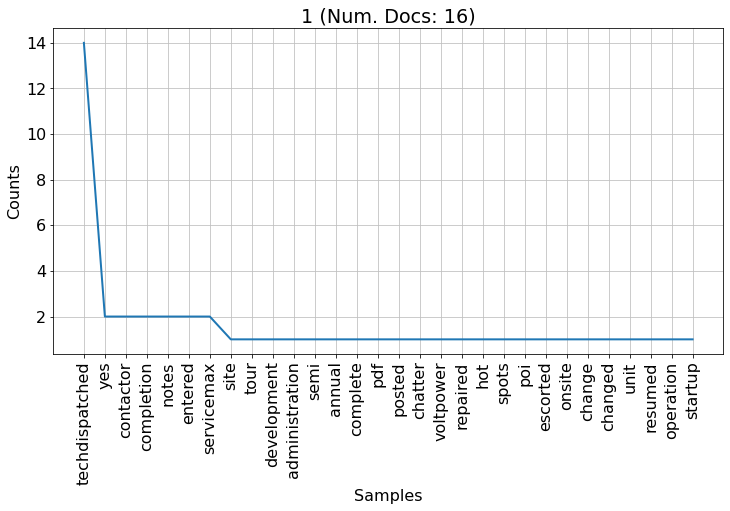

FreqDist({'techdispatched': 14, 'yes': 2, 'contactor': 2, 'completion': 2, 'notes': 2, 'entered': 2, 'servicemax': 2, 'site': 1, 'tour': 1, 'development': 1, ...})

In [20]:
e.LABEL_COLUMN = 'Unsupervised_Pred_Asset'
e.visualize_freqPlot(LBL_CAT = 1)

## Visualize Word Clusters

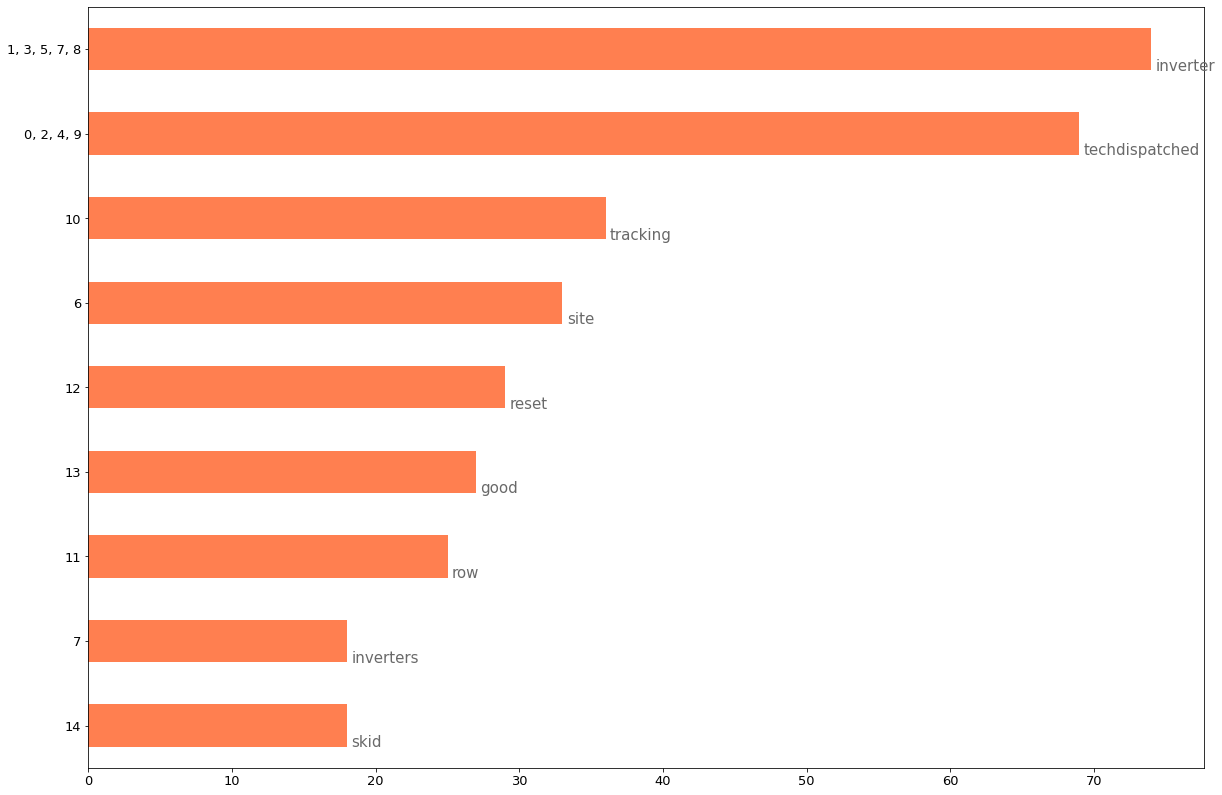

In [21]:
fig = e.visualize_document_clusters(min_frequency=10, DATA_COLUMN='CleanDesc')
plt.show()

### Seeing the popularity of `techdispatched`, one might consider adding `techdispatched` to the stopwords list